In [25]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

path = r'../Life_Expectancy_preprocessed_v2.csv'
data = pd.read_csv(path)
cleanData = data.dropna()

numeric_columns = ['Adult Mortality', 'infant deaths', 'Alcohol',
                   'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
                   'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
                   'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
                   'thinness 5-9 years', 'Income composition of resources', 'Schooling']
X = cleanData[numeric_columns]
y = cleanData[['Developed']]

tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X, y)

feature_importances = tree_classifier.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

top_n_features = 5
selected_features = importance_df['Feature'][:top_n_features].tolist()

X_selected = X[selected_features]


                            Feature  Importance
2                           Alcohol    0.559138
0                   Adult Mortality    0.152351
16  Income composition of resources    0.059276
17                        Schooling    0.047261
9                 Total expenditure    0.043674
1                     infant deaths    0.034374
4                       Hepatitis B    0.031936
7                 under-five deaths    0.023880
15               thinness 5-9 years    0.014205
14             thinness  1-19 years    0.012694
3            percentage expenditure    0.008506
10                       Diphtheria    0.004599
5                           Measles    0.004092
6                               BMI    0.004014
8                             Polio    0.000000
11                         HIV/AIDS    0.000000
12                              GDP    0.000000
13                       Population    0.000000


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

path = '../Life_Expectancy_preprocessed_v2.csv'
data = pd.read_csv(path)
cleanData = data.dropna()

X = cleanData[['Adult Mortality','Alcohol','BMI','Schooling','thinness  1-19 years','thinness 5-9 years',
               'Income composition of resources','Total expenditure', 'infant deaths', 'percentage expenditure', 'Diphtheria', 'Measles', 'Hepatitis B', 'under-five deaths']]
y = cleanData[['Developed']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logReg = LogisticRegression()
logReg.fit(X_train,y_train)

coef = logReg.coef_
intercept = logReg.intercept_

print(f"The Coefficient for the X values are: {coef}")
print(f"The Intercept is: {intercept}")

The Coefficient for the X values are: [[-1.16460184e-02  3.18883954e-01 -1.79011383e-02  4.66707234e-02
  -1.49258675e-01 -1.46131839e-01  3.69153050e-03 -2.76684558e-02
  -3.80990326e-01  1.42272072e-04 -1.61166941e-02  1.57647852e-04
   1.28202262e-02 -5.05597865e-01]]
The Intercept is: [-0.00867539]


c:\Users\layoc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\layoc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
predictions = logReg.predict(X_test)

# for i, result in zip(X_test.values, predictions):
#     result_str = "Developed" if result == 1 else "Not Developed"
#     print(f"Features: {i}, Predicted result: {result_str}")

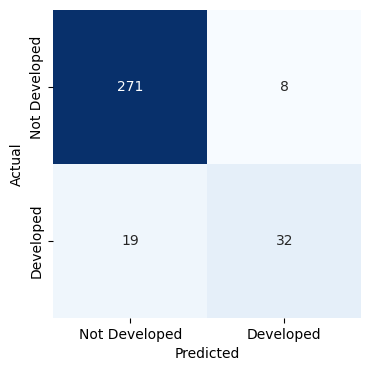

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# confusion matrix
cm = confusion_matrix(y_test, predictions)

# visualize
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, xticklabels=['Not Developed', 'Developed'], yticklabels=['Not Developed', 'Developed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy) 

Accuracy: 0.9181818181818182


In [30]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, predictions, target_names=['Not Developed', 'Developed'])

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
                precision    recall  f1-score   support

Not Developed       0.93      0.97      0.95       279
    Developed       0.80      0.63      0.70        51

     accuracy                           0.92       330
    macro avg       0.87      0.80      0.83       330
 weighted avg       0.91      0.92      0.91       330



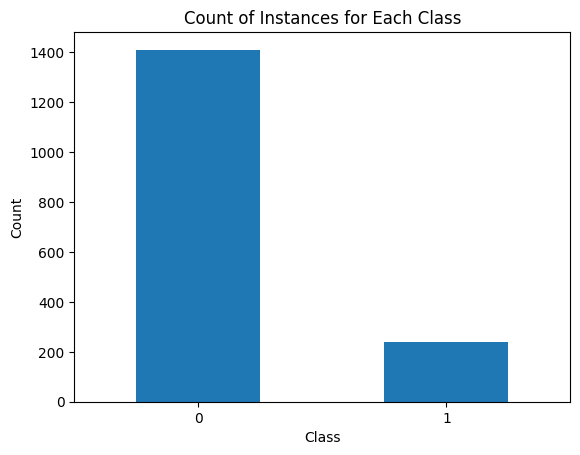

Count of Instances for Each Class:
Developed
0    1411
1     238
Name: count, dtype: int64


In [31]:
import matplotlib.pyplot as plt

class_counts = y['Developed'].value_counts()

# Create a bar plot
class_counts.plot(kind='bar')
plt.title("Count of Instances for Each Class")
plt.xticks(rotation=0)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

class_counts = y['Developed'].value_counts()

print("Count of Instances for Each Class:")
print(class_counts)